# Zomato Data Analysis Project

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Creating data frame


In [3]:
df = pd.read_csv("zomato_data.csv")

In [4]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [5]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


## datatypes

In [6]:
df.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object

## Changing datatype of column - rate 

In [7]:
def change_rate(value):
    value = str(value).split("/")
    value = value[0]
    return float(value)


In [8]:
df['rate'] = df['rate'].apply(change_rate)

In [9]:
df.dtypes

name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
approx_cost(for two people)      int64
listed_in(type)                 object
dtype: object

In [10]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [11]:
df.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


## outliers in rate

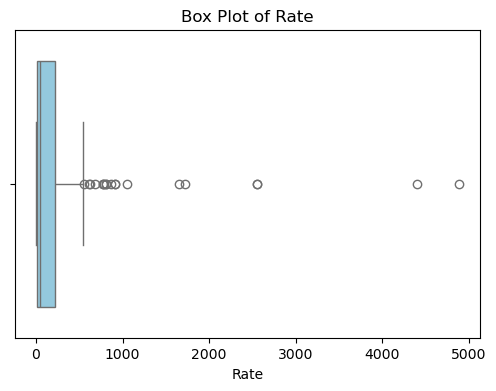

In [12]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['votes'], color='skyblue')
plt.title('Box Plot of Rate')
plt.xlabel('Rate')
plt.show()


## null check in data

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## 1.which type restaurent has more order

In [14]:
df['listed_in(type)'].value_counts()

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64

<Axes: xlabel='Type of restaurant', ylabel='No.of Restaurant'>

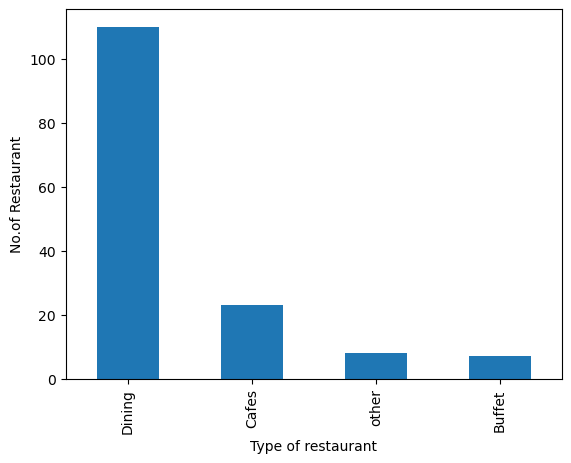

In [15]:
df['listed_in(type)'].value_counts().plot(kind='bar',xlabel='Type of restaurant',ylabel='No.of Restaurant')

###  Majority of restaurants are of Dining category

In [16]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [17]:
df['online_order'].value_counts()

online_order
No     90
Yes    58
Name: count, dtype: int64

In [18]:
df_online = df[df['online_order']=='Yes']

In [19]:
df_online.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
5,Timepass Dinner,Yes,No,3.8,286,600,Buffet
7,Onesta,Yes,Yes,4.6,2556,600,Cafes


<Axes: xlabel='type of restaurant', ylabel='No of restaurant'>

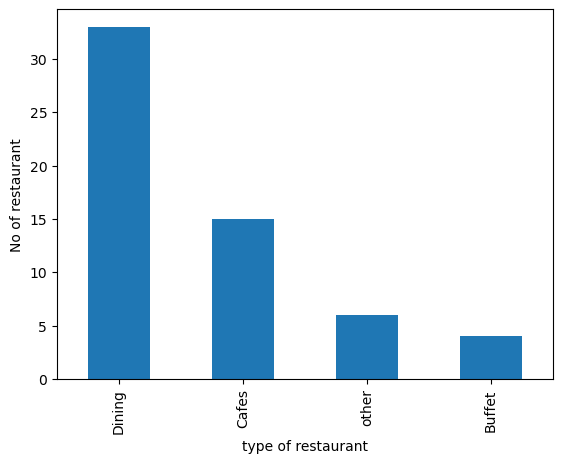

In [20]:
df_online['listed_in(type)'].value_counts().plot(kind='bar',xlabel='type of restaurant',ylabel='No of restaurant')

# conclusion - Type of restaurant, majority of customer order from is dining

In [21]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# 2. Number of votes each type of restaurant received

In [22]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(world_readable=True, theme='pearl')

In [23]:
df.groupby('listed_in(type)')['votes'].sum().iplot(kind='bar',
    title='Total Votes by Type',
    xTitle='asdsa',
    yTitle='Votes',
    color='orange',
    theme='white',
    layout=dict(
        width=800,
        height=600,
        xaxis=dict(title='Type of restaurants'),
        yaxis=dict(title='Total No.of votes'),
    ),
)

# conclusion - dining type restaurants got highest votes

In [24]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# 3.Rating of majority of restaurants

In [25]:
df['rate'].value_counts()

rate
3.8    20
3.7    15
3.3    14
3.4    12
4.1    11
3.6    11
4.0    10
3.9    10
4.2     8
3.1     7
3.2     7
2.9     7
3.5     6
4.6     2
2.8     2
4.4     2
3.0     2
4.3     1
2.6     1
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

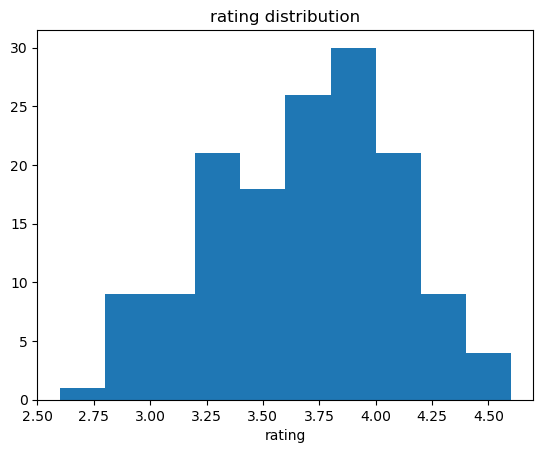

In [26]:
plt.hist(df['rate'],bins=10)
plt.title('rating distribution')
plt.xlabel('rating')
plt.show

# conclusion - majority of restaurants received ratings from 3.75 to 4

# 4.Avg spending of couple in each order

In [27]:
df['approx_cost(for two people)'].describe()

count    148.000000
mean     418.243243
std      223.085098
min      100.000000
25%      200.000000
50%      400.000000
75%      600.000000
max      950.000000
Name: approx_cost(for two people), dtype: float64

In [28]:
df_couple_data = df['approx_cost(for two people)']

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

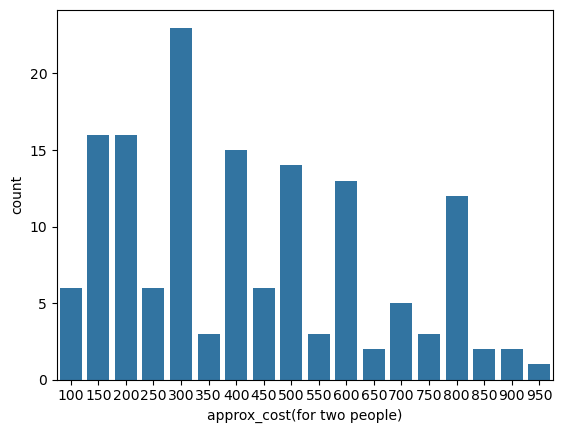

In [29]:
sns.countplot(x=df_couple_data)

# conclusion - majority of couple preferr restaurant with an approximate cost of 300rs 

In [30]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# 5. Maximum rating of each modes - (online/offline)

In [31]:
df_rating = df[['online_order','rate']]

In [32]:
df_rating.groupby('online_order')['rate'].max()

online_order
No     4.3
Yes    4.6
Name: rate, dtype: float64

In [33]:
df_rating.groupby('online_order')['rate'].max()

online_order
No     4.3
Yes    4.6
Name: rate, dtype: float64

<Axes: xlabel='online_order', ylabel='rate'>

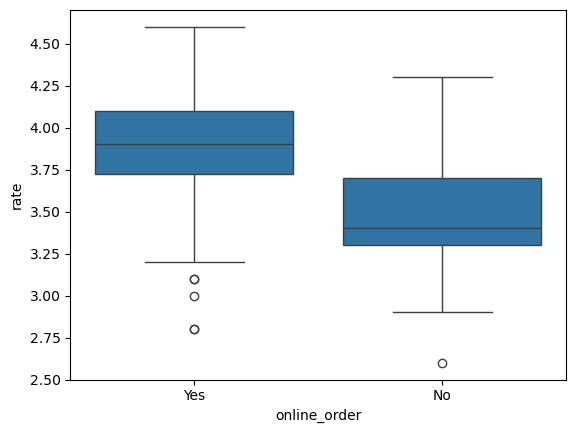

In [34]:
sns.boxplot(data=df,x='online_order',y='rate')

# conclusion - online order has higher rating in comparison with offline.

In [36]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: title={'center': 'Online Order Counts by Category'}, xlabel='Category', ylabel='Count'>

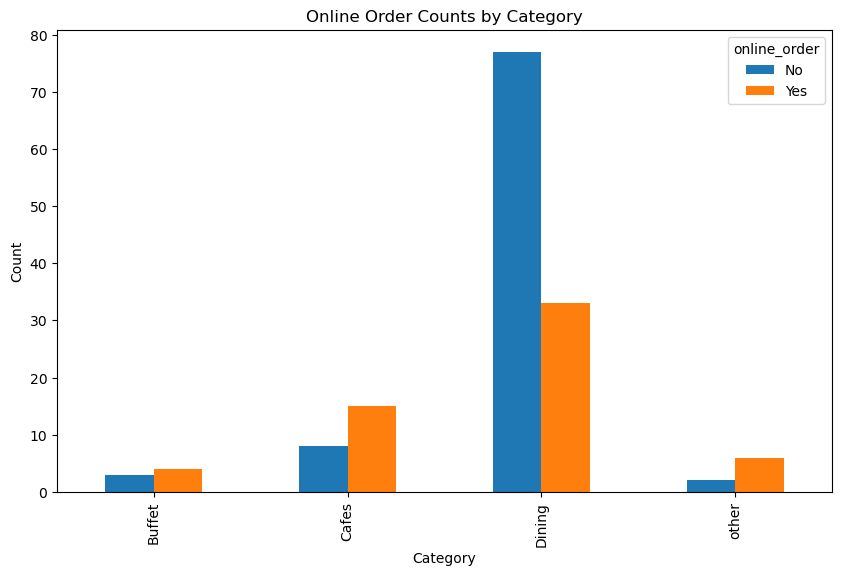

In [47]:
df.groupby(['listed_in(type)', 'online_order']).size().unstack().plot(
    kind='bar',
    title='Online Order Counts by Category',
    ylabel='Count',
    xlabel='Category',
    figsize=(10, 6),
)


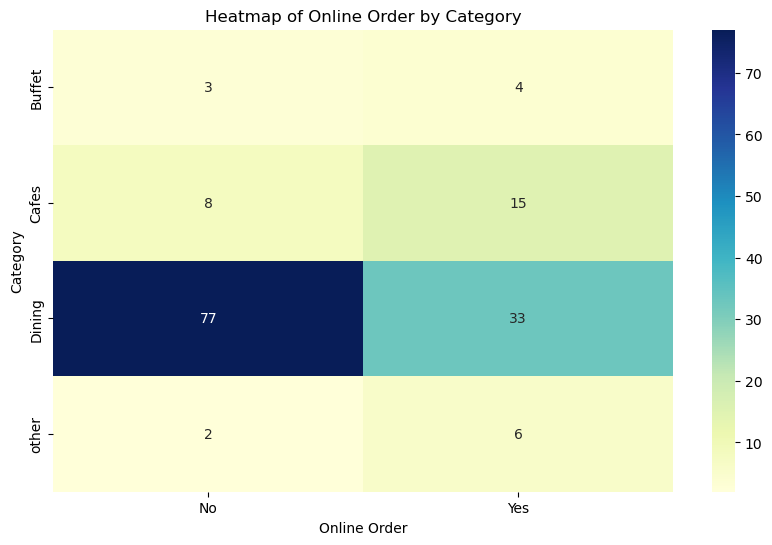

In [49]:
heatmap_data = df.groupby(['listed_in(type)', 'online_order']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Online Order by Category')
plt.xlabel('Online Order')
plt.ylabel('Category')
plt.show()

<span style="color:red">Conclusion </span> - <span style="font-size:18px;font-weight:bold;">Dining</span>  Restaurant receives more <span style="font-size:18px;font-weight:bold;">offline</span> order whereas <span style="font-size:18px;font-weight:bold;">cafes</span> receives more <span style="font-size:18px;font-weight:bold;">online</span> orders than offline. <br>
<span style="font-size:18px;font-weight:bold;">This suggests that customer prefer to place order in person at dining restaurant and prefer online ordering at cafes </span>.
